First, we have to import pandas and load the data.

In [72]:
import pandas as pd

data = pd.read_csv('data/main_data.tab',sep='\t')

data

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


* We need to run 9 OLS models and combine them into one table.

* Based on the Supplementary Information, we see that there are actually 3 'groups' of models; 
`Manual matching`, `Coarsened exact matching` and `Coarsened exact matching (w/o Buenos Aires)`.



Let's import the libraries needed to run the regressions.

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
# from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

Let's start with the `Manual matching`.

We need to check fow the rows that satisfy this condition: $$ matched__simple==1 $$

In [74]:
data1 = data.loc[data['matched_simple'] == 1]
data1

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
804,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
805,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
806,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
807,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
808,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129707,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129708,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129709,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129710,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN


* The first set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2`


In [75]:
independent_variables1 = ' + '.join(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2'])

repression_ols_mod1 = smf.ols("lnrepression ~ " + independent_variables1, data = data1)
repression_ols_res1 = repression_ols_mod1.fit(cov_type='hc1')
repression_ols_res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.554
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.53e-08
Time:                        21:03:19   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:                  hc1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0292      0.008      3.446      0.001       0.013       0.046
hostcitytime      0.4239      0.148      2.868      0.004       0.134       0.714
hostcitytime2    -0.3405      0.113     -3.005      0.003      -0.563      -0.118
hostcity         -0.0064      0.035     -0.182      0.856      -0.075       0.063
time             -0.0255      0.031     -0.810      0.418      -0.087       0.036
time2             0.0196      0.025      0.785      0.433      -0.029       0.068
==============================================================================
Omnibus:                     4313.416   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218155.116
Skew:                           5.436   Prob(JB):                         0.00
Kurtosis:                      37.064   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

* The second set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2, lnpop_1970, vote_frejuli, literacy_avg, lnrebact1974, lnrepression70_77`


In [76]:
independent_variables2 = ' + '.join(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77'])

repression_ols_mod2 = smf.ols("lnrepression ~ " + independent_variables2, data = data1)
repression_ols_res2 = repression_ols_mod2.fit(cov_type='hc1')
repression_ols_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     12.90
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.82e-22
Time:                        21:03:19   Log-Likelihood:                 1394.7
No. Observations:                4095   AIC:                            -2767.
Df Residuals:                    4084   BIC:                            -2698.
Df Model:                          10                                         
Covariance Type:                  hc1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9371      0.141     -6.668      0.000      -1.213      -0.662
hostcitytime          0.4239      0.135      3.132      0.002       0.159       0.689
hostcitytime2        -0.3405      0.105     -3.250      0.001      -0.546      -0.135
hostcity             -0.1001      0.035     -2.896      0.004      -0.168      -0.032
time                 -0.0255      0.031     -0.817      0.414      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
lnpop_1970            0.0867      0.011      8.218      0.000       0.066       0.107
vote_frejuli         -0.0014      0.001     -2.732      0.006      -0.002      -0.000
literacy_avg          0.0089      0.087      0.102      0.919      -0.162       0.180
lnrebact1974         -0.0049      0.002     -2.790      0.005      -0.008      -0.001
lnrepression70_77    -0.0029      0.002     -1.296      0.195      -0.007       0.002
==============================================================================
Omnibus:                     4103.436   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186868.735
Skew:                           5.032   Prob(JB):                         0.00
Kurtosis:                      34.527   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The third set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2, lnpop_1970, vote_frejuli, literacy_avg, lnrebact1974, lnrepression70_77, zone2, zone3, zone4, zone5`



In [77]:
independent_variables3 = ' + '.join(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5'])

repression_ols_mod3 = smf.ols("lnrepression ~ " + independent_variables3, data = data1)
repression_ols_res3 = repression_ols_mod3.fit(cov_type='hc1')
repression_ols_res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     10.48
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           9.72e-24
Time:                        21:03:19   Log-Likelihood:                 1444.5
No. Observations:                4095   AIC:                            -2859.
Df Residuals:                    4080   BIC:                            -2764.
Df Model:                          14                                         
Covariance Type:                  hc1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9783      0.172     -5.701      0.000      -1.315      -0.642
hostcitytime          0.4239      0.131      3.241      0.001       0.168       0.680
hostcitytime2        -0.3405      0.102     -3.344      0.001      -0.540      -0.141
hostcity             -0.0766      0.033     -2.347      0.019      -0.141      -0.013
time                 -0.0255      0.031     -0.818      0.413      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
lnpop_1970            0.0872      0.011      7.761      0.000       0.065       0.109
vote_frejuli         -0.0009      0.001     -1.575      0.115      -0.002       0.000
literacy_avg          0.2092      0.102      2.045      0.041       0.009       0.410
lnrebact1974         -0.0204      0.003     -6.641      0.000      -0.026      -0.014
lnrepression70_77    -0.0160      0.004     -4.168      0.000      -0.024      -0.008
zone2                -0.1095      0.013     -8.699      0.000      -0.134      -0.085
zone3                -0.0857      0.011     -7.639      0.000      -0.108      -0.064
zone4                -0.0162      0.009     -1.854      0.064      -0.033       0.001
zone5                -0.0682      0.010     -6.635      0.000      -0.088      -0.048
==============================================================================
Omnibus:                     4026.867   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177134.357
Skew:                           4.887   Prob(JB):                         0.00
Kurtosis:                      33.702   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's continue with the `Coarsened exact matching`.

We need to check fow the rows that satisfy this condition: $$ matched__allhosts==1 $$

In [78]:
data2 = data.loc[data['matched_allhosts'] == 1]
data2

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
1340,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
1341,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
1342,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
1343,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
1344,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129707,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129708,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129709,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129710,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN


* The first set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2`


In [79]:
repression_ols_mod4 = smf.ols("lnrepression ~ " + independent_variables1, data = data2)
repression_ols_res4 = repression_ols_mod4.fit(cov_type='hc1')
repression_ols_res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.528
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.58e-05
Time:                        21:03:19   Log-Likelihood:                 129.20
No. Observations:                2223   AIC:                            -246.4
Df Residuals:                    2217   BIC:                            -212.2
Df Model:                           5                                         
Covariance Type:                  hc1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0581      0.017      3.397      0.001       0.025       0.092
hostcitytime      0.4654      0.157      2.962      0.003       0.157       0.773
hostcitytime2    -0.3677      0.120     -3.052      0.002      -0.604      -0.132
hostcity         -0.0354      0.038     -0.925      0.355      -0.110       0.040
time             -0.0670      0.062     -1.087      0.277      -0.188       0.054
time2             0.0467      0.048      0.980      0.327      -0.047       0.140
==============================================================================
Omnibus:                     1927.744   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42862.975
Skew:                           4.210   Prob(JB):                         0.00
Kurtosis:                      22.795   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

* The second set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2, lnpop_1970, vote_frejuli, literacy_avg, lnrebact1974, lnrepression70_77`


In [80]:
repression_ols_mod5 = smf.ols("lnrepression ~ " + independent_variables2, data = data2)
repression_ols_res5 = repression_ols_mod5.fit(cov_type='hc1')
repression_ols_res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     10.24
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.85e-17
Time:                        21:03:19   Log-Likelihood:                 242.42
No. Observations:                2223   AIC:                            -462.8
Df Residuals:                    2212   BIC:                            -400.1
Df Model:                          10                                         
Covariance Type:                  hc1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8412      0.330     -5.574      0.000      -2.489      -1.194
hostcitytime          0.4654      0.142      3.279      0.001       0.187       0.744
hostcitytime2        -0.3677      0.111     -3.315      0.001      -0.585      -0.150
hostcity             -0.1593      0.040     -3.935      0.000      -0.239      -0.080
time                 -0.0670      0.061     -1.091      0.275      -0.187       0.053
time2                 0.0467      0.048      0.982      0.326      -0.047       0.140
lnpop_1970            0.1348      0.018      7.656      0.000       0.100       0.169
vote_frejuli         -0.0029      0.001     -2.714      0.007      -0.005      -0.001
literacy_avg          0.6144      0.278      2.210      0.027       0.070       1.159
lnrebact1974         -0.0171      0.006     -3.069      0.002      -0.028      -0.006
lnrepression70_77    -0.0172      0.006     -2.936      0.003      -0.029      -0.006
==============================================================================
Omnibus:                     1797.738   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36636.153
Skew:                           3.809   Prob(JB):                         0.00
Kurtosis:                      21.371   Cond. No.                     5.36e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The third set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2, lnpop_1970, vote_frejuli, literacy_avg, lnrebact1974, lnrepression70_77, zone2, zone3, zone4, zone5`



In [81]:
repression_ols_mod6 = smf.ols("lnrepression ~ " + independent_variables3, data = data2)
repression_ols_res6 = repression_ols_mod6.fit(cov_type='hc1')
repression_ols_res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     11.90
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.37e-27
Time:                        21:03:19   Log-Likelihood:                 273.97
No. Observations:                2223   AIC:                            -517.9
Df Residuals:                    2208   BIC:                            -432.3
Df Model:                          14                                         
Covariance Type:                  hc1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6046      0.335     -1.807      0.071      -1.260       0.051
hostcitytime          0.4654      0.138      3.367      0.001       0.194       0.736
hostcitytime2        -0.3677      0.109     -3.379      0.001      -0.581      -0.154
hostcity             -0.1286      0.039     -3.321      0.001      -0.204      -0.053
time                 -0.0670      0.061     -1.097      0.273      -0.187       0.053
time2                 0.0467      0.047      0.988      0.323      -0.046       0.139
lnpop_1970            0.1096      0.016      6.758      0.000       0.078       0.141
vote_frejuli         -0.0021      0.001     -1.951      0.051      -0.004    9.25e-06
literacy_avg         -0.1811      0.298     -0.608      0.543      -0.764       0.402
lnrebact1974         -0.0710      0.013     -5.353      0.000      -0.097      -0.045
lnrepression70_77    -0.0177      0.006     -2.809      0.005      -0.030      -0.005
zone2                -0.1731      0.026     -6.789      0.000      -0.223      -0.123
zone3                -0.1857      0.031     -5.953      0.000      -0.247      -0.125
zone4                -0.0206      0.011     -1.891      0.059      -0.042       0.001
zone5                -0.0066      0.013     -0.518      0.605      -0.031       0.018
==============================================================================
Omnibus:                     1758.814   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35516.615
Skew:                           3.685   Prob(JB):                         0.00
Kurtosis:                      21.142   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally, the `Coarsened exact matching (w/o Buenos Aires)`.

We need to check fow the rows that satisfy this condition: $$ matched__nocapfed==1 $$

In [82]:
data3 = data.loc[data['matched_nocapfed'] == 1]
data3

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
2144,bahia blanca,9.0,buenos aires,1.0,bahia blanca buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,1.0,1.0,1.0
2145,bahia blanca,9.0,buenos aires,1.0,bahia blanca buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,1.0,1.0,1.0
2146,bahia blanca,9.0,buenos aires,1.0,bahia blanca buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,1.0,1.0,1.0
2147,bahia blanca,9.0,buenos aires,1.0,bahia blanca buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,1.0,1.0,1.0
2148,bahia blanca,9.0,buenos aires,1.0,bahia blanca buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,rosario,446.0,santa fe,21.0,rosario santa fe,0.0,0.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,1.0,1.0,1.0
119524,rosario,446.0,santa fe,21.0,rosario santa fe,0.0,0.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,1.0,1.0,1.0
119525,rosario,446.0,santa fe,21.0,rosario santa fe,0.0,0.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,1.0,1.0,1.0
119526,rosario,446.0,santa fe,21.0,rosario santa fe,0.0,0.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,1.0,1.0,1.0


* The first set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2`


In [83]:
repression_ols_mod7 = smf.ols("lnrepression ~ " + independent_variables1, data = data3)
repression_ols_res7 = repression_ols_mod7.fit(cov_type='hc1')
repression_ols_res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     3.241
Date:                Mon, 19 Dec 2022   Prob (F-statistic):            0.00649
Time:                        21:03:19   Log-Likelihood:                 373.23
No. Observations:                1404   AIC:                            -734.5
Df Residuals:                    1398   BIC:                            -703.0
Df Model:                           5                                         
Covariance Type:                  hc1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0365      0.022      1.669      0.095      -0.006       0.079
hostcitytime      0.1888      0.116      1.631      0.103      -0.038       0.416
hostcitytime2    -0.1659      0.091     -1.829      0.067      -0.344       0.012
hostcity         -0.0414      0.028     -1.466      0.143      -0.097       0.014
time              0.0144      0.084      0.170      0.865      -0.151       0.180
time2            -0.0075      0.066     -0.113      0.910      -0.138       0.122
==============================================================================
Omnibus:                     1400.118   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45368.483
Skew:                           4.990   Prob(JB):                         0.00
Kurtosis:                      28.999   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

* The second set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2, lnpop_1970, vote_frejuli, literacy_avg, lnrebact1974, lnrepression70_77`


In [84]:
repression_ols_mod8 = smf.ols("lnrepression ~ " + independent_variables2, data = data3)
repression_ols_res8 = repression_ols_mod8.fit(cov_type='hc1')
repression_ols_res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.208
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.55e-07
Time:                        21:03:19   Log-Likelihood:                 385.54
No. Observations:                1404   AIC:                            -749.1
Df Residuals:                    1393   BIC:                            -691.4
Df Model:                          10                                         
Covariance Type:                  hc1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2970      0.481      0.618      0.537      -0.645       1.239
hostcitytime          0.1888      0.115      1.640      0.101      -0.037       0.414
hostcitytime2        -0.1659      0.090     -1.842      0.065      -0.342       0.011
hostcity             -0.0333      0.034     -0.974      0.330      -0.100       0.034
time                  0.0144      0.083      0.172      0.863      -0.149       0.178
time2                -0.0075      0.065     -0.115      0.908      -0.135       0.120
lnpop_1970           -0.0196      0.014     -1.376      0.169      -0.048       0.008
vote_frejuli          0.0027      0.001      1.795      0.073      -0.000       0.006
literacy_avg         -0.2986      0.477     -0.626      0.532      -1.234       0.637
lnrebact1974          0.0022      0.008      0.281      0.779      -0.013       0.018
lnrepression70_77     0.0182      0.008      2.184      0.029       0.002       0.035
==============================================================================
Omnibus:                     1374.148   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42285.041
Skew:                           4.860   Prob(JB):                         0.00
Kurtosis:                      28.066   Cond. No.                     7.16e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 7.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The third set of independent variables is the following: `hostcitytime, hostcitytime2, hostcity, time, time2, lnpop_1970, vote_frejuli, literacy_avg, lnrebact1974, lnrepression70_77, zone2, zone3, zone4, zone5`



In [85]:
repression_ols_mod9 = smf.ols("lnrepression ~ " + independent_variables3, data = data3)
repression_ols_res9 = repression_ols_mod9.fit(cov_type='hc1')
repression_ols_res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.642
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.52e-08
Time:                        21:03:19   Log-Likelihood:                 390.61
No. Observations:                1404   AIC:                            -751.2
Df Residuals:                    1389   BIC:                            -672.5
Df Model:                          14                                         
Covariance Type:                  hc1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3632      0.579      0.628      0.530      -0.771       1.498
hostcitytime          0.1888      0.115      1.645      0.100      -0.036       0.414
hostcitytime2        -0.1659      0.090     -1.844      0.065      -0.342       0.010
hostcity             -0.0338      0.038     -0.900      0.368      -0.107       0.040
time                  0.0144      0.083      0.173      0.863      -0.148       0.177
time2                -0.0075      0.065     -0.115      0.908      -0.135       0.120
lnpop_1970           -0.0708      0.121     -0.585      0.558      -0.308       0.166
vote_frejuli          0.0042      0.006      0.678      0.498      -0.008       0.016
literacy_avg          0.0801      1.221      0.066      0.948      -2.314       2.474
lnrebact1974          0.0275      0.069      0.396      0.692      -0.108       0.163
lnrepression70_77     0.0323      0.035      0.932      0.351      -0.036       0.100
zone2                 0.0280      0.142      0.197      0.844      -0.251       0.307
zone3                 0.0547      0.197      0.278      0.781      -0.332       0.441
zone4                -0.0307      0.018     -1.662      0.096      -0.067       0.006
zone5                -0.0754      0.047     -1.598      0.110      -0.168       0.017
==============================================================================
Omnibus:                     1364.661   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41410.044
Skew:                           4.811   Prob(JB):                         0.00
Kurtosis:                      27.805   Cond. No.                     9.92e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, it is time to combine all the models into one dataframe.

We will use the same function `createTable` as in Q4.

In [86]:
def createTable(dflist,colnames):
    df_list = list()
    results = pd.DataFrame()
    for i in range(0,len(dflist)):
        df = dflist[i].to_frame(name=colnames[i])
        results = pd.concat([results,df],axis=1)
    results = results.round(3)
    return results

In [87]:
dfs = list()

dfs.append(repression_ols_res1.params)
dfs.append(repression_ols_res2.params)
dfs.append(repression_ols_res3.params)
dfs.append(repression_ols_res4.params)
dfs.append(repression_ols_res5.params)
dfs.append(repression_ols_res6.params)
dfs.append(repression_ols_res7.params)
dfs.append(repression_ols_res8.params)
dfs.append(repression_ols_res9.params)

colnames=[]

for i in range(len(dfs)):
    colnames.append(f'({i+1})')
    
colnames


['(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)', '(8)', '(9)']

In [88]:
res = createTable(dfs,colnames)
res = res.loc[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2','Intercept']]

res.rename({'hostcity':'Host City',
                'hostcitytime':'Host City * Time',
                'hostcitytime2':'Host City * Time2',
                'time':'Time',
                'time2': 'Time2',
                'Intercept': 'Constant'},inplace=True)

res

,(1),(2),(3),(4),(5),(6),(7),(8),(9)
Host City * Time,0.424,0.424,0.424,0.465,0.465,0.465,0.189,0.189,0.189
Host City * Time2,-0.341,-0.341,-0.341,-0.368,-0.368,-0.368,-0.166,-0.166,-0.166
Host City,-0.006,-0.100,-0.077,-0.035,-0.159,-0.129,-0.041,-0.033,-0.034
Time,-0.026,-0.026,-0.026,-0.067,-0.067,-0.067,0.014,0.014,0.014
Time2,0.020,0.020,0.020,0.047,0.047,0.047,-0.008,-0.008,-0.008
Constant,0.029,-0.937,-0.978,0.058,-1.841,-0.605,0.036,0.297,0.363


Now, we need to add the standard deviation for each variable.

We will use the method we created, `createTable`.

In [89]:
stds = list()

stds.append(repression_ols_res1.bse)
stds.append(repression_ols_res2.bse)
stds.append(repression_ols_res3.bse)
stds.append(repression_ols_res4.bse)
stds.append(repression_ols_res5.bse)
stds.append(repression_ols_res6.bse)
stds.append(repression_ols_res7.bse)
stds.append(repression_ols_res8.bse)
stds.append(repression_ols_res9.bse)

st = createTable(stds,colnames)
st = st.loc[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2','Intercept']]


for i in colnames:
    st[i] = st[i].apply(lambda x: f'({x})')
    
st.rename({'hostcity':'Host City Std',
                'hostcitytime':'Host City * Time Std',
                'hostcitytime2':'Host City * Time2 Std',
                'time':'Time Std',
                'time2': 'Time2 Std',
                'Intercept': 'Constant Std'}, inplace=True)

In [90]:
st

,(1),(2),(3),(4),(5),(6),(7),(8),(9)
Host City * Time Std,(0.148),(0.135),(0.131),(0.157),(0.142),(0.138),(0.116),(0.115),(0.115)
Host City * Time2 Std,(0.113),(0.105),(0.102),(0.12),(0.111),(0.109),(0.091),(0.09),(0.09)
Host City Std,(0.035),(0.035),(0.033),(0.038),(0.04),(0.039),(0.028),(0.034),(0.038)
Time Std,(0.031),(0.031),(0.031),(0.062),(0.061),(0.061),(0.084),(0.083),(0.083)
Time2 Std,(0.025),(0.025),(0.025),(0.048),(0.048),(0.047),(0.066),(0.065),(0.065)
Constant Std,(0.008),(0.141),(0.172),(0.017),(0.33),(0.335),(0.022),(0.481),(0.579)


Now, it is time to combine the two dataframes, `results` and `st`.

Now, it is time to add the metrics of the 3 models.

Fist, we extract the pseudo R^2.

In [91]:
results = res.append(st)
results = results[~results.index.duplicated()]
results = results.reindex(['Host City * Time','Host City * Time Std',
                           'Host City * Time2','Host City * Time2 Std',
                           'Host City','Host City Std',
                           'Time','Time Std',
                           'Time2','Time2 Std',
                           'Constant','Constant Std'])
results = results.fillna('')

results

,(1),(2),(3),(4),(5),(6),(7),(8),(9)
Host City * Time,0.424,0.424,0.424,0.465,0.465,0.465,0.189,0.189,0.189
Host City * Time Std,(0.148),(0.135),(0.131),(0.157),(0.142),(0.138),(0.116),(0.115),(0.115)
Host City * Time2,-0.341,-0.341,-0.341,-0.368,-0.368,-0.368,-0.166,-0.166,-0.166
Host City * Time2 Std,(0.113),(0.105),(0.102),(0.12),(0.111),(0.109),(0.091),(0.09),(0.09)
Host City,-0.006,-0.1,-0.077,-0.035,-0.159,-0.129,-0.041,-0.033,-0.034
Host City Std,(0.035),(0.035),(0.033),(0.038),(0.04),(0.039),(0.028),(0.034),(0.038)
Time,-0.026,-0.026,-0.026,-0.067,-0.067,-0.067,0.014,0.014,0.014
Time Std,(0.031),(0.031),(0.031),(0.062),(0.061),(0.061),(0.084),(0.083),(0.083)
Time2,0.02,0.02,0.02,0.047,0.047,0.047,-0.008,-0.008,-0.008
Time2 Std,(0.025),(0.025),(0.025),(0.048),(0.048),(0.047),(0.066),(0.065),(0.065)


Now, it is time to add the metrics of the 3 models.

`Controls` shows if the control variables are used in the model.

The control variables are: `lnpop_1970, vote_frejuli, literacy_avg, lnrebact1974, lnrepression70_77`

Only the first model of each 'group' does not use the control variables.


In [92]:
c = ['✗','✓','✓','✗','✓','✓','✗','✓','✓']

Similarly, `Zone FE` shows if include fixed effects for military zones are used in the model.

The fixed effect variables are : `zone2, zone3, zone4, zone5`

Only the third model of each 'group' does uses the fixed effect variables.

In [93]:
fe =  ['✗','✗','✓','✗','✗','✓','✗','✗','✓']

Then, we extract R^2.

In [94]:
rs = list()

rs.append(repression_ols_res1.rsquared)
rs.append(repression_ols_res2.rsquared)
rs.append(repression_ols_res3.rsquared)
rs.append(repression_ols_res4.rsquared)
rs.append(repression_ols_res5.rsquared)
rs.append(repression_ols_res6.rsquared)
rs.append(repression_ols_res7.rsquared)
rs.append(repression_ols_res8.rsquared)
rs.append(repression_ols_res9.rsquared)

rs

[0.032746337444441664,
 0.0983745937019953,
 0.12005217376340971,
 0.02349665483547303,
 0.11806428896607046,
 0.1427443341420681,
 0.0033883959636664684,
 0.020716203749042483,
 0.02776026760273953]

Then, the F-Statistic.

In [95]:
fs = list()

fs.append(repression_ols_res1.fvalue)
fs.append(repression_ols_res2.fvalue)
fs.append(repression_ols_res3.fvalue)
fs.append(repression_ols_res4.fvalue)
fs.append(repression_ols_res5.fvalue)
fs.append(repression_ols_res6.fvalue)
fs.append(repression_ols_res7.fvalue)
fs.append(repression_ols_res8.fvalue)
fs.append(repression_ols_res9.fvalue)

fs

[8.553755612955198,
 12.897270207785988,
 10.478545338680217,
 5.527829019037692,
 10.23713777066179,
 11.899849837544107,
 3.2409564230641763,
 5.208147856608283,
 4.641664995818824]

Finally, the number of observations.

In [96]:
obs = list()

obs.append(repression_ols_res1.nobs)
obs.append(repression_ols_res2.nobs)
obs.append(repression_ols_res3.nobs)
obs.append(repression_ols_res4.nobs)
obs.append(repression_ols_res5.nobs)
obs.append(repression_ols_res6.nobs)
obs.append(repression_ols_res7.nobs)
obs.append(repression_ols_res8.nobs)
obs.append(repression_ols_res9.nobs)

obs

[4095.0, 4095.0, 4095.0, 2223.0, 2223.0, 2223.0, 1404.0, 1404.0, 1404.0]

Now, we need to create a new dataframe with these metrics.

In [97]:
dt={}
indexes = ['Controls','Zone FE','F Statistic','R^2','Observations']
for i in range(len(rs)):
    dt[colnames[i]]=[c[i],fe[i],round(fs[i],2),round(rs[i],2),round(obs[i],2)]
    
metrics = pd.DataFrame(dt,index=indexes)

metrics

,(1),(2),(3),(4),(5),(6),(7),(8),(9)
Controls,✗,✓,✓,✗,✓,✓,✗,✓,✓
Zone FE,✗,✗,✓,✗,✗,✓,✗,✗,✓
F Statistic,8.55,12.9,10.48,5.53,10.24,11.9,3.24,5.21,4.64
R^2,0.03,0.1,0.12,0.02,0.12,0.14,0.0,0.02,0.03
Observations,4095.0,4095.0,4095.0,2223.0,2223.0,2223.0,1404.0,1404.0,1404.0


In [98]:
results1 = results.append(metrics)
results1 = results1[~results1.index.duplicated()]

results1

,(1),(2),(3),(4),(5),(6),(7),(8),(9)
Host City * Time,0.424,0.424,0.424,0.465,0.465,0.465,0.189,0.189,0.189
Host City * Time Std,(0.148),(0.135),(0.131),(0.157),(0.142),(0.138),(0.116),(0.115),(0.115)
Host City * Time2,-0.341,-0.341,-0.341,-0.368,-0.368,-0.368,-0.166,-0.166,-0.166
Host City * Time2 Std,(0.113),(0.105),(0.102),(0.12),(0.111),(0.109),(0.091),(0.09),(0.09)
Host City,-0.006,-0.1,-0.077,-0.035,-0.159,-0.129,-0.041,-0.033,-0.034
Host City Std,(0.035),(0.035),(0.033),(0.038),(0.04),(0.039),(0.028),(0.034),(0.038)
Time,-0.026,-0.026,-0.026,-0.067,-0.067,-0.067,0.014,0.014,0.014
Time Std,(0.031),(0.031),(0.031),(0.062),(0.061),(0.061),(0.084),(0.083),(0.083)
Time2,0.02,0.02,0.02,0.047,0.047,0.047,-0.008,-0.008,-0.008
Time2 Std,(0.025),(0.025),(0.025),(0.048),(0.048),(0.047),(0.066),(0.065),(0.065)


In [99]:
t1 = results1[colnames[:3]]
t2 = results1[colnames[3:6]]
t3 = results1[colnames[6:9]]

In [100]:
t1 = pd.DataFrame(t1.values,
                 index=t1.index,
                 columns = pd.MultiIndex.from_product([['Manual matching'],[colnames[0],colnames[1],colnames[2]]]))

t2 = pd.DataFrame(t2.values,
                 index=t2.index,
                 columns = pd.MultiIndex.from_product([['Coarsened exact matching'],[colnames[3],colnames[4],colnames[5]]]))

t3 = pd.DataFrame(t3.values,
                 index=t3.index,
                 columns = pd.MultiIndex.from_product([['Coarsened exact matching (w/o Buenos Aires)'],[colnames[6],colnames[7],colnames[8]]]))

In [101]:
table = pd.concat([t1, t2,t3], axis=1)
# table = table.style

This is the final table SI.4.7 of the Supplementary Information.

In [102]:
table

Manual matching                    \
                                  (1)      (2)      (3)   
Host City * Time                0.424    0.424    0.424   
Host City * Time Std          (0.148)  (0.135)  (0.131)   
Host City * Time2              -0.341   -0.341   -0.341   
Host City * Time2 Std         (0.113)  (0.105)  (0.102)   
Host City                      -0.006     -0.1   -0.077   
Host City Std                 (0.035)  (0.035)  (0.033)   
Time                           -0.026   -0.026   -0.026   
Time Std                      (0.031)  (0.031)  (0.031)   
Time2                            0.02     0.02     0.02   
Time2 Std                     (0.025)  (0.025)  (0.025)   
Constant                        0.029   -0.937   -0.978   
Constant Std                  (0.008)  (0.141)  (0.172)   
Controls                            ✗        ✓        ✓   
Zone FE                             ✗        ✗        ✓   
F Statistic                      8.55     12.9    10.48   
R^2                              0.03      0.1     0.12   
Observations                   4095.0   4095.0   4095.0   

                      Coarsened exact matching                    \
                                           (4)      (5)      (6)   
Host City * Time                         0.465    0.465    0.465   
Host City * Time Std                   (0.157)  (0.142)  (0.138)   
Host City * Time2                       -0.368   -0.368   -0.368   
Host City * Time2 Std                   (0.12)  (0.111)  (0.109)   
Host City                               -0.035   -0.159   -0.129   
Host City Std                          (0.038)   (0.04)  (0.039)   
Time                                    -0.067   -0.067   -0.067   
Time Std                               (0.062)  (0.061)  (0.061)   
Time2                                    0.047    0.047    0.047   
Time2 Std                              (0.048)  (0.048)  (0.047)   
Constant                                 0.058   -1.841   -0.605   
Constant Std                           (0.017)   (0.33)  (0.335)   
Controls                                     ✗        ✓        ✓   
Zone FE                                      ✗        ✗        ✓   
F Statistic                               5.53    10.24     11.9   
R^2                                       0.02     0.12     0.14   
Observations                            2223.0   2223.0   2223.0   

                      Coarsened exact matching (w/o Buenos Aires)           \
                                                              (7)      (8)   
Host City * Time                                            0.189    0.189   
Host City * Time Std                                      (0.116)  (0.115)   
Host City * Time2                                          -0.166   -0.166   
Host City * Time2 Std                                     (0.091)   (0.09)   
Host City                                                  -0.041   -0.033   
Host City Std                                             (0.028)  (0.034)   
Time                                                        0.014    0.014   
Time Std                                                  (0.084)  (0.083)   
Time2                                                      -0.008   -0.008   
Time2 Std                                                 (0.066)  (0.065)   
Constant                                                    0.036    0.297   
Constant Std                                              (0.022)  (0.481)   
Controls                                                        ✗        ✓   
Zone FE                                                         ✗        ✗   
F Statistic                                                  3.24     5.21   
R^2                                                           0.0     0.02   
Observations                                               1404.0   1404.0   

                                
                           (9)  
Host City * Time         0.189  
Host City * Time Std   (0

Now, it is time to recreate Figure 6 of the main paper.

We will use the `data2` dataframe, since it is the one with: $$ matched__allhosts==1 $$

In [103]:
data2

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
1340,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
1341,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
1342,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
1343,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
1344,avellaneda,6.0,buenos aires,1.0,avellaneda buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129707,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129708,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129709,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129710,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN


To make the predictions, we will use the 6th model we created; `repression_ols_res6`

We will use this model to predict repression for host cities and no-host cities.

So, we split the data.

In [104]:
host = data1.loc[data1['hostcity'] == 1]

nohost = data1.loc[data1['hostcity'] == 0]

Now, we predict.

In [105]:
model3 = smf.ols("repression ~ " + independent_variables3, data = data1)
m3 = model3.fit(cov_type='hc1')
m3.summary()

phost = m3.predict(host)
phost = phost.to_frame()
phost = phost.rename(columns={0:'pred'})

pnohost = m3.predict(nohost)
pnohost = pnohost.to_frame()
pnohost = pnohost.rename(columns={0:'pred'})

In [106]:
h = pd.merge(host,phost,left_index=True,right_index=True)
nh = pd.merge(nohost,pnohost,left_index=True,right_index=True)

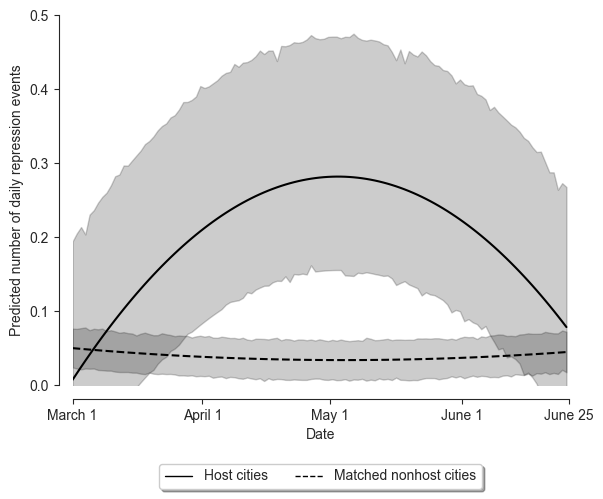

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

sns.set_style("ticks")

# _=sns.lmplot(x="time", y='pred', data=t,ci=95,scatter_kws={"s": 5});
l1 = sns.lineplot(x='time', y= 'pred', data=h,color='black',linestyle='-')
l2= sns.lineplot(x='time', y= 'pred', data=nh,color='black',linestyle='--')

sns.despine(trim = False, offset=10)
plt.xticks(rotation=45)

l1.set_xticks([0.01,0.315,0.615,0.925,1.175])
l1.set_xticklabels(["March 1","April 1","May 1","June 1","June 25"])
plt.xticks(rotation=0)

l1.set(ylim=(0, 0.5),
      xlim=(0.01,1.175),
      xlabel='Date',
      ylabel = "Predicted number of daily repression events"
      )

legend_handles = [Line2D([0], [0], color='black', lw=1, label='Host cities',linestyle='-'),
                  Line2D([0], [0], color='black', lw=1, label='Matched nonhost cities',linestyle='--')]

plt.legend(bbox_to_anchor=(0.5,-0.3),
           handles = legend_handles,
           fancybox=True, shadow=True, ncol=2, loc='lower center')
plt.show()

## Interpretation

The above figure is created using matched samples and acts as a robustness check to support the hypotheses stated by the authors.

According to the Supporting Information for the main paper, ***manual matching*** uses the range of Population size (min–max) of all departments with host cities to select those departments without host cities into the control group.

This means, that the sample excludes small and sparsely populated departments.

Based on the figure, we can conclude that those excluded departments are actually statistically insignificant. The reason for this assumption is that both "curves" of the figure bear a strong resemblance to the "curves" of the figure 5 (Q3).

This is actually positive for checking/attesting the hypotheses and the results of the authors, since their findings remain substantively unchanged, even after using matched samples.

**To conclude, this test is proof that their results are robust to this sample composition (manual matching) and unlikely to be driven by covariate imbalances or model dependencies.**
